In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#scipy.special for the sigmoid function expit()
import scipy.special

In [3]:
class NeuralNetwork:
    
    #initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.lr = learningrate
        
        
        #link weight matrices, wih and who
        #weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        #w11, w21
        #w12, w22 etc
        #A martix for the weights for links between the input and hidden layes, W input_hidden, of size (hidden_nodes by input_nodes)
        #another matrix for the links between the hidden and output layes, whidden_output of size (output_nodes by hidden_nodes)
        self.wih = np.random.rand(self.hnodes, self.inodes) - 0.5
        self.who = np.random.rand(self.onodes, self.hnodes) - 0.5
        
        #acivation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    
    
    #train the neural network
    def train(self, inputs_list, targets_list):
        #convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin = 2).T
        targets = np.array(targets_list, ndmin = 2).T
        
        #calcualte signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        #calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        #error is the (target - actual)
        output_errors = targets - final_outputs
        
        #hidden layer error is the output_erros, split by weights,
        #recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)
        
        
        #update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * ( 1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        #update the weights for the links between the input and hidden layer
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * ( 1.0 - hidden_outputs)), np.transpose(inputs))
        pass
    
    
    def query(self, inputs_list):
        #convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        #calculate signals into hidden layes
        #X = W.I
        hidden_inputs = np.dot(self.wih, inputs)
        #calculate the signals emergng from hidden layes
        hidden_outputs = self.activation_function(hidden_inputs)
        
        
        #calculate signals into final output layes
        final_inputs = np.dot(self.who, hidden_outputs)
        #calculate the signals emerging from final output layes
        final_outputs = self.activation_function(final_inputs)
        

        return final_outputs
        pass

In [5]:
#accessing datasets
datasets = pd.read_csv("Breast_cancer_data.csv")
datasets.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [7]:
#separate the dependent and independent variable
X = datasets.iloc[:, :-1].values
y = datasets.iloc[:,-1].values
print(X[:5])
print(y[:5])


[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01]]
[0 0 0 0 0]


In [37]:
#standard noralization
average_value = []
standard_value = []
for i in range(len(X[1,:])):
    average_value.append(np.mean(X[i]))
    standard_value.append(np.std(X[i]))

print(average_value)
print(standard_value)
row_index = 0
for row in X:
    item_index = 0
    for item in row:
        X[row_index,item_index]= (float(item) - average_value[item_index]) /standard_value[item_index]
        item_index += 1
    row_index += 1

[0.8255450373975503, 1.2889337682730222, 1.1200498063195223, -0.026410809656098922, 1.2486696774590273]
[2.6786182037882584, 3.5598928719555185, 3.2230145508301122, 0.9977923895288325, 3.4807825518496487]


In [38]:
X[:5]

array([[-0.52585808, -0.51962463, -0.44865339,  6.21941974, -0.5258457 ],
       [-0.50560569, -0.51559702, -0.44193353,  8.45111237, -0.52586489],
       [-0.50644827, -0.51370039, -0.44386299,  7.60650255, -0.52585072],
       [-0.51436666, -0.51417455, -0.47873973,  1.99705727, -0.52583197],
       [-0.50587378, -0.5174664 , -0.4404698 ,  8.25197672, -0.52585602]])

In [56]:
input_nodes = 5
hidden_nodes = 10
output_nodes = 2

learning_rate = 0.1
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

Total malagnant cases observed 357
Total benign cases observed 69


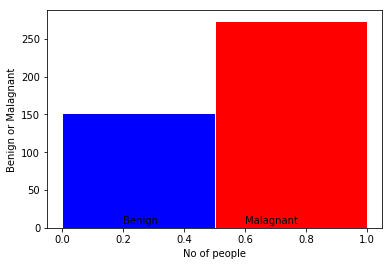

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Check for number of malignant and benign cases
malagnant_list = [a for a in y_train if a == 1]
print('Total malagnant cases observed ' + str(len(z)))
print('Total benign cases observed '+ str(len(y_train) - len(z)))

n, bin, patches = plt.hist(y_train, bins = 2, edgecolor='white' )
patches[0].set_facecolor('b')
patches[1].set_facecolor('r')
plt.xlabel("No of people")
plt.ylabel("Benign or Malagnant")
plt.annotate('Benign' , (0.2,5))
plt.annotate('Malagnant' , (0.6,5))
plt.show()

In [58]:
epoach = 100
for i in range(epoach):
    for index in range(len(X_train)):
        targets = np.zeros(output_nodes) + 0.01
        targets[int(y_train[index])] = 0.99
        n.train(X_train[index], targets)

[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.9

[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.9

[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.0

[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.9

[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.9

[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.0

[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.9

[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.9

[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.9

[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.0

[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.0

[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.9

[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.9

[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.0

[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.9

[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.0

[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.0

[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.9

[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.0

[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.0

[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.0

[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.0

[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.9

[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.0

[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.0

[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.9

[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.0

[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.0

[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.9

[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.0

[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.0

[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.9

[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.9

[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.9

[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.9

[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.0

[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.0

[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.9

[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.0

[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.0

[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.0

[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.9

[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.0

[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.0

[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.9

[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.9

[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.01 0.99]
[0.99 0.01]
[0.01 0.99]
[0.99 0.01]
[0.99 0.01]
[0.99 0.01]
[0.01 0.99]
[0.9

In [59]:
scorecard = []
for index in range(len(X_test)):
    classifier = n.query(X_test[index])
    print("target value " + str(y_test[index]))
    tmp = np.argmax(classifier)
    print("obtained valule " + str(tmp))
    if tmp == 1:
        scorecard.append(1)
    else:
        scorecard.append(0)

print("Performance is " + str(np.sum(scorecard)/ len(scorecard)))

target value 1
obtained valule 1
target value 0
obtained valule 0
target value 1
obtained valule 1
target value 1
obtained valule 1
target value 0
obtained valule 0
target value 0
obtained valule 0
target value 0
obtained valule 0
target value 1
obtained valule 1
target value 1
obtained valule 1
target value 0
obtained valule 0
target value 0
obtained valule 0
target value 1
obtained valule 1
target value 0
obtained valule 1
target value 1
obtained valule 1
target value 0
obtained valule 0
target value 1
obtained valule 1
target value 0
obtained valule 0
target value 1
obtained valule 1
target value 1
obtained valule 1
target value 0
obtained valule 0
target value 1
obtained valule 1
target value 1
obtained valule 1
target value 1
obtained valule 1
target value 0
obtained valule 1
target value 1
obtained valule 1
target value 1
obtained valule 1
target value 1
obtained valule 1
target value 0
obtained valule 0
target value 1
obtained valule 1
target value 1
obtained valule 1
target val

357
212


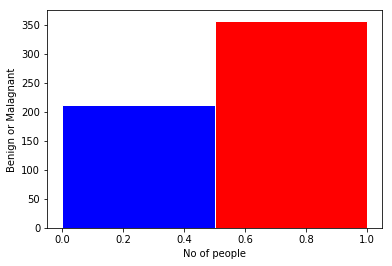